# LSTM for Regression Using the Window Method

In window method multiple, recent time steps can be used to make the prediction for the next time step and the size of the window is a parameter that can be tuned for each problem.

Given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables. i.e. When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.

The difference between Example 5 and Example 6 is only look_back argument that is changed from 1 to 3.

Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

#### Import packages

In [1]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Fix random seed for reproducibility

In [2]:
numpy.random.seed(7)

#### Load the dataset

In [5]:
dataframe = read_csv('AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset)

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]
 [104.]
 [118.]
 [115.]
 [126.]
 [141.]
 [135.]
 [125.]
 [149.]
 [170.]
 [170.]
 [158.]
 [133.]
 [114.]
 [140.]
 [145.]
 [150.]
 [178.]
 [163.]
 [172.]
 [178.]
 [199.]
 [199.]
 [184.]
 [162.]
 [146.]
 [166.]
 [171.]
 [180.]
 [193.]
 [181.]
 [183.]
 [218.]
 [230.]
 [242.]
 [209.]
 [191.]
 [172.]
 [194.]
 [196.]
 [196.]
 [236.]
 [235.]
 [229.]
 [243.]
 [264.]
 [272.]
 [237.]
 [211.]
 [180.]
 [201.]
 [204.]
 [188.]
 [235.]
 [227.]
 [234.]
 [264.]
 [302.]
 [293.]
 [259.]
 [229.]
 [203.]
 [229.]
 [242.]
 [233.]
 [267.]
 [269.]
 [270.]
 [315.]
 [364.]
 [347.]
 [312.]
 [274.]
 [237.]
 [278.]
 [284.]
 [277.]
 [317.]
 [313.]
 [318.]
 [374.]
 [413.]
 [405.]
 [355.]
 [306.]
 [271.]
 [306.]
 [315.]
 [301.]
 [356.]
 [348.]
 [355.]
 [422.]
 [465.]
 [467.]
 [404.]
 [347.]
 [305.]
 [336.]
 [340.]
 [318.]
 [362.]
 [348.]
 [363.]
 [435.]
 [491.]
 [505.]
 [404.]
 [359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]
 [396.]
 [420.]


#### Normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### Split the ordered dataset into train and test datasets

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### Convert an array of values into a dataset matrix

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

#### Reshape into X=t and Y=t+1
The create_dataset() function we created in the previous section allows us to create this formulation of the time series problem by increasing the look_back argument from 1 to 3.

In [9]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Reshape input to be [samples, time steps, features]

In [12]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Create and fit the LSTM network

In [13]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - loss: 0.0382
Epoch 2/100
92/92 - 0s - loss: 0.0158
Epoch 3/100
92/92 - 0s - loss: 0.0110
Epoch 4/100
92/92 - 0s - loss: 0.0096
Epoch 5/100
92/92 - 0s - loss: 0.0085
Epoch 6/100
92/92 - 0s - loss: 0.0074
Epoch 7/100
92/92 - 0s - loss: 0.0065
Epoch 8/100
92/92 - 0s - loss: 0.0059
Epoch 9/100
92/92 - 0s - loss: 0.0052
Epoch 10/100
92/92 - 0s - loss: 0.0046
Epoch 11/100
92/92 - 0s - loss: 0.0044
Epoch 12/100
92/92 - 0s - loss: 0.0040
Epoch 13/100
92/92 - 0s - loss: 0.0038
Epoch 14/100
92/92 - 0s - loss: 0.0037
Epoch 15/100
92/92 - 0s - loss: 0.0037
Epoch 16/100
92/92 - 0s - loss: 0.0035
Epoch 17/100
92/92 - 0s - loss: 0.0034
Epoch 18/100
92/92 - 0s - loss: 0.0035
Epoch 19/100
92/92 - 0s - loss: 0.0033
Epoch 20/100
92/92 - 0s - loss: 0.0034
Epoch 21/100
92/92 - 0s - loss: 0.0032
Epoch 22/100
92/92 - 0s - loss: 0.0033
Epoch 23/100
92/92 - 0s - loss: 0.0031
Epoch 24/100
92/92 - 0s - loss: 0.0032
Epoch 25/100
92/92 - 0s - loss: 0.0031
Epoch 26/100
92/92 - 0s - loss: 0.

#### Performance of Model

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.78 RMSE
Test Score: 52.74 RMSE


#### Plot baseline and predictions

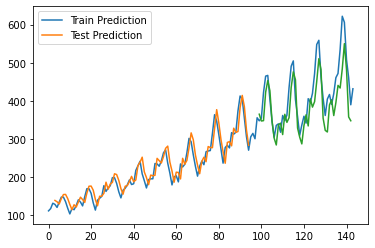

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train Prediction', 'Test Prediction'])
plt.show()